# Imports

In [20]:
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms

from src.data.tiny_imagenet_dataset import SmallImageNetTrainDataset

# Data

In [85]:
transform = transforms.Compose([
        transforms.Resize((512, 512)),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = SmallImageNetTrainDataset(
        root_dir=r"/Users/egorprokopov/Documents/ITMO/BachelorThesis/data/small_imagenet_object_loc/train",
        classes_names_path=r"/Users/egorprokopov/Documents/ITMO/BachelorThesis/data/small_imagenet_object_loc/classes_names.txt",
        transform=transform
)

In [86]:
image, label, image_tag = dataset[0]

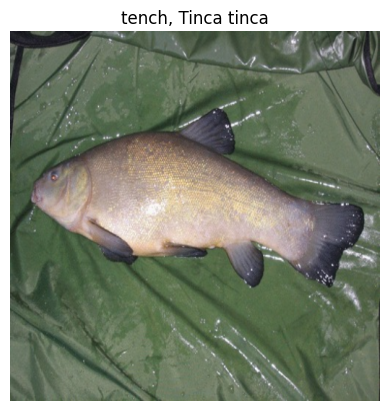

In [87]:
plt.title(f"{dataset.classes_names[image_tag]}")
plt.axis('off')
plt.imshow(image.permute(1, 2, 0).cpu().numpy(), cmap="gray" if image.shape[0] == 1 else None)

# SVD

In [88]:
image.shape

torch.Size([3, 512, 512])

In [89]:
rank = 50

approx_image_channels = []
for image_channel in image:
    U, S, Vh = torch.linalg.svd(image_channel)
    approx_image_channel = (U[:, :rank] @ torch.diag(S[:rank]) @ Vh[:rank, :])
    approx_image_channels.append(approx_image_channel)
    
approx_image = torch.stack(approx_image_channels)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0052254675..1.0098895].


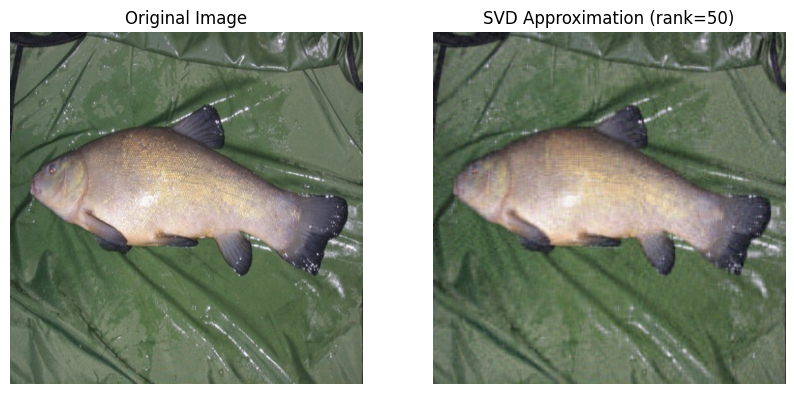

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image.permute(1, 2, 0).cpu().numpy(), cmap="gray" if image.shape[0] == 1 else None)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(approx_image.permute(1, 2, 0).cpu().numpy(), cmap="gray" if image.shape[0] == 1 else None)
axes[1].set_title(f"SVD Approximation (rank={rank})")
axes[1].axis("off")

plt.show()